In [6]:
import pandas as pd 

data = pd.read_csv('Table10.6.csv')

In [21]:
data.head(10)

,Males,Females
0,12,11
1,4,9
2,11,7
3,13,10
4,11,9
5,7,10
6,9,10
7,10,7
8,10,9
9,7,10


The researcher aims to determine if there is a statistically significant difference in the mean time spent on cellphones per week between male and female college students. The data consists of the number of hours per week spent by 50 male and 50 female students from Midwestern University on their phones.

**1. Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.**

**Hypotheses**

- Null Hypothesis ($H_0$): There is no difference in the mean times spent on cellphones between male and female students. This is can be stated as: 
  $$H_0:\mu_1 = \mu_2 $$
  where
  - $\mu_1$ = mean time spent on cellphones per week by male students.
  - $\mu_2$ = mean time spent on cellphones per week by female students.
- Alternative Hypothesis ($H_1$): There is a difference in the mean times spent on cellphones between male and female students. Mathematically:
  $$H_0:\mu_1 \neq \mu_2 $$

**Rationale for the Hypothesis Test**

Based from the hypotheses above, the independent sample t-test or the two sample t-test is the hypothesis test that is best recommended for the researcher to use. This test will allow the researchers to determine whether there is a statistical difference between the population means for the two groups. 

*Note: Prior to conducting t-test, the t-test assumes the following presumptions about the data:*

1. The data for male and female students are independent samples.
2. The distribution of time spent on cell phones is approximately normal.
3. The male and female students have equal variances.

Based from the description, this is not a paired design or matched-pair scenario, and no connections between the two groups were mentioned, the independence assumption is met in this case. If normality and equal variances also holds, the researcher can proceed with the t-test. In cases where assumptions are not met, consider non-parametric alternatives such as Mann-Whitney U test for non-normally distributed data or the Wilcoxon Signed rank test for unequal variances.

**2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?**

**Assumption 2: Normality Check Using Shapiro-Wilk Test**

In [12]:
import scipy.stats as stats

male_times = data['Males']
female_times = data['Females']

shapiro_male = stats.shapiro(male_times)
shapiro_female = stats.shapiro(female_times)

print(f"Male: Test Statistic = {shapiro_male.statistic}, p-value = {shapiro_male.pvalue}")
print(f"Female: Test Statistic = {shapiro_female.statistic}, p-value = {shapiro_female.pvalue}")

Male: Test Statistic = 0.9746540784835815, p-value = 0.35399243235588074
Female: Test Statistic = 0.9638767838478088, p-value = 0.12919674813747406


Both males and females data on hours spent talking on cellphones are normally distributed, as evidenced by a p-value greater than 0.05

As a good measure though, we will still look for any potential outliers that could violate the normalcy assumption or could skew the analysis. 

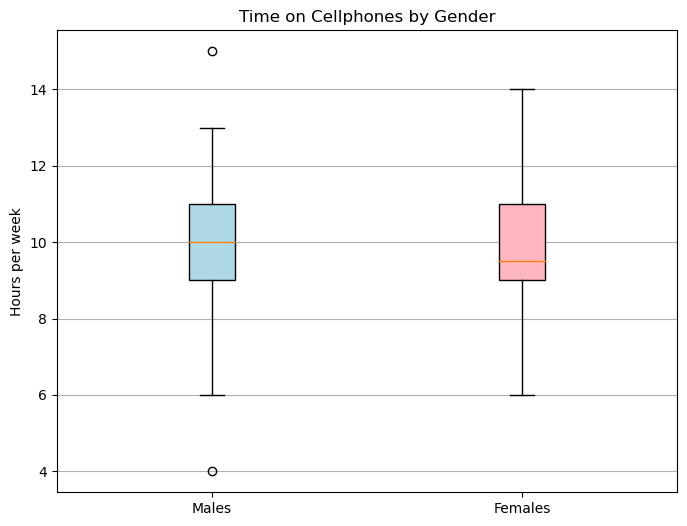

In [26]:
import matplotlib.pyplot as plt

data = [male_times, female_times]
labels = ['Males', 'Females']
plt.figure(figsize=(8,6))
box = plt.boxplot(data, labels=labels, patch_artist=True)
colors = ['lightblue', 'lightpink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Time on Cellphones by Gender')
plt.ylabel('Hours per week')
plt.grid(axis='y')
plt.show()

Notice that there are hollowed circles outside the whiskers of the boxplot in Males. These points represents cases over 1.5 box lengths from the upper or lower end of the box and are called outliers. This means that there are males who use their phones far more (15) or less (4) than the majority of the male students in the data. 

After giving them some thought, it's best to keep them since extreme or low phone usage may be uncommon but realistic. It is a plausible behavior which might be useful later on.

**Assumption 3: Variance Check Using Levene Test**

In [11]:
levene_test = stats.levene(male_times, female_times)

print(f"Test Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")

Test Statistic = 0.6943460393935098, p-value = 0.40671633986363454


As the p-value is greater than the significance level of 0.05, the two samples, male and female, have equal variances.

**Two Sample T-test**

    Since all assumptions holds, we proceed with conducting the t-test.

In [15]:
t_statistic, p_value = stats.ttest_ind(male_times, female_times)

print(f"T-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

T-statistic: 0.3039, p-value: 0.7618


> The p-value (0.7618) is significantly greater than the significance level of 0.05, therefore, we fail to reject the null hypothesis. This means that based on the t-test, there is no significant difference in the mean time spent on cellphones per week between male and female students at Midwestern University.

**Recommendations**

- **Sample Size:** The current study had 50 males and 50 females, which is a reasonable start, but if there are small differences in phone usage between genders, they may not be detectable with this sample size. A larger sample size is therefore recommended to increase the chance of detecting a true difference if one exists.


- **Other Factors:** The current study only examines gender as a variable. However, phone usage could be influenced by many other factors. The researcher could consider other variables such as age, academic year, major, or socioeconomic background. These factors could provide a better understanding of phone usage patterns. It may also be worth examining if phone usage is tied to specific activities (e.g., social media, academic work, or gaming) to better understand potential differences.

**3. Provide descriptive statistical summaries of the data for each gender category.**

In [13]:
descstats = pd.DataFrame({
    'Males': male_times.describe(),
    'Females': female_times.describe()
})

descstats

,Males,Females
count,50.000000,50.000000
mean,9.820000,9.700000
std,2.154161,1.775686
min,4.000000,6.000000
25%,9.000000,9.000000
50%,10.000000,9.500000
75%,11.000000,11.000000
max,15.000000,14.000000


**4. What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?**

In [19]:
import numpy as np

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data) 
    margin_error = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean - margin_error, mean + margin_error

male_ci = confidence_interval(male_times)
female_ci = confidence_interval(female_times)
mean_diff = np.mean(male_times) - np.mean(female_times)

sem_diff = np.sqrt(stats.sem(male_times)**2 + stats.sem(female_times)**2)
marginerr_diff = sem_diff * stats.t.ppf((1 + 0.95) / 2., len(male_times) + len(female_times) - 2)
ci_diff = (mean_diff - marginerr_diff, mean_diff + marginerr_diff)

print(f"95% CI for Males: {male_ci}")
print(f"95% CI for Females: {female_ci}")
print(f"95% CI for Difference in Means: {ci_diff}")

95% CI for Males: (9.207794314064703, 10.432205685935298)
95% CI for Females: (9.19535558679254, 10.20464441320746)
95% CI for Difference in Means: (-0.6634736514965714, 0.9034736514965734)


**5. Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.**

   Yes, a larger sample size is needed since the sample size used (50 males and 50 females) might not be large enough to detect subtle differences in phone usage.  With smaller sample sizes, there is a higher risk of a Type II error (failing to reject the null hypothesis when there actually is a difference). A larger sample size would provide more insights in detecting the difference between two groups.
    
   The current test focuses only on total hours spent on the phone, but how students are using their phones (e.g., for social media, gaming, studying) might differ significantly between males and females. More testing could break down phone usage by activity type to explore if specific patterns (like more social media use in one gender or more gaming in another) explain some of the differences in total usage. 

**6. Make a report including the testing of the assumptions for two independent samples t-test.**

**I. Introduction.**

> This report investigates whether there is a statistically significant difference in the mean time spent on cell phones per week between male and female college students at Midwestern University. A two-independent samples t-test will be performed, and the assumptions underlying this test will be examined.

**II. Data Summary.**

> The data consists of the number of hours per week spent by 50 male and 50 female students from Midwestern University on their phones.

**III. Hypotheses.**

> Null Hypothesis ($𝐻_0$): There is no difference in the mean time spent on cell phones between male and female students ($\mu_1 = \mu_2$)

> Alternative Hypothesis ($𝐻_1$): There is a difference in the mean time spent on cell phones between male and female students ($\mu_1 \neq \mu_2$).

- **IV. Testing Assumptions.**
Before conducting the t-test, we must verify the following assumptions:

    - **Independence of Samples.**
The samples from male and female students are independent of each other, as they were randomly selected without any relation or influence between the two groups.   

    - **Normality.**
To test the normality of the distribution of hours spent on cell phones, we can use the Shapiro-Wilk test. A p-value greater than 0.05 indicates that the data is normally distributed.

        ```Male: Test Statistic = 0.9746540784835815, p-value = 0.35399243235588074```
        ```Female: Test Statistic = 0.9638767838478088, p-value = 0.12919674813747406```

        Both groups showed a p-value greater than 0.05, suggesting that the assumption of normality holds for both male and female students.
     
    - **Variances.**
To assess whether the variances of the two groups are equal, Levene's test was conducted. 

       ```Test Statistic = 0.6943460393935098, p-value = 0.40671633986363454```

       Given that the p-value is higher than 0.05, the assumption of equal variance holds.

**V. T-Test Analysis**

> Since all assumptions have been satisfied, we proceed with the two-sample t-test.  
      
```T-statistic: 0.3039, p-value: 0.7618```


**VI. Descriptive Statistics**

|              | Males | Females |
|--------------|-------|---------|
|  **count**   |50.000 |50.000   |
|  **mean**    |9.820  |9.700    |
|  **std**     |2.154  |1.776    |
|  **min**     |4.000  |6.000    |
|  **25%**     |9.000  |9.000    |
|  **50%**     |10.000 |9.500    |
|  **75%**     |11.000 |11.000   |
|  **max**     |15.000 |14.000   |

**VII. Confidence Intervals**

>    ```95% CI for Males: (9.207794314064703, 10.432205685935298)```       
>    ```95% CI for Females: (9.19535558679254, 10.20464441320746)```      
>    ```95% CI for Difference in Means: (-0.6634736514965714, 0.9034736514965734)```

**VIII. Conclusion**
> The p-value (0.7618) is significantly greater than the significance level of 0.05, therefore, we fail to reject the null hypothesis. This means that based on the t-test, there is no significant difference in the mean time spent on cellphones per week between male and female students at Midwestern University.

**VIIII. Recommendation**
> **Sample Size:** The current study had 50 males and 50 females, which is a reasonable start, but if there are small differences in phone usage between genders, they may not be detectable with this sample size. With smaller sample sizes, there is a higher risk of a Type II error (failing to reject the null hypothesis when there actually is a difference). A larger sample size is therefore recommended to increase the chance of detecting a true difference if one exists. 

> **Other Factors:** The current study only examines gender as a variable. However, phone usage could be influenced by many other factors. The researcher could consider other variables such as age, academic year, major, or socioeconomic background. These factors could provide a better understanding of phone usage patterns. In addition, the presence of outliers indicates variability within the data, it may also be worth examining if phone usage is tied to specific activities (e.g., social media, academic work, or gaming) to better understand potential differences.